## <center>Artists</center>

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connecting the JSON file to Pandas
df = pd.read_json('AccountData/StreamingHistory0.json')
df.to_csv('SpotifyStreamData.csv')
df

,endTime,artistName,trackName,msPlayed
0,2022-12-01 06:52,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",43753
1,2022-12-06 04:17,Anirudh Ravichander,"Jailer Announcement Theme (From ""Jailer"")",1000
2,2022-12-06 04:20,Anirudh Ravichander,"Jailer Announcement Theme (From ""Jailer"")",56990
3,2022-12-06 04:21,Kamal Eleven,Jailer x NTR 30 BGM,25290
4,2022-12-06 04:21,Anirudh Ravichander,VIP Theme,16328
...,...,...,...,...
815,2023-12-05 04:38,Anirudh Ravichander,"Badass (From ""Leo"")",12283
816,2023-12-05 04:53,Santhosh Narayanan,Ding Dong,403088
817,2023-12-05 04:54,Santhosh Narayanan,Maamadura,90935
818,2023-12-05 04:58,Santhosh Narayanan,Ding Dong,234209


In [3]:
# Cleaning the time column to the correct format.
df['playTime'] = pd.to_datetime(df['endTime'])
df['year'] = pd.DatetimeIndex(df['playTime']).year
df['month'] = pd.DatetimeIndex(df['playTime']).month
df['day'] = pd.DatetimeIndex(df['playTime']).day
df['weekday'] = pd.DatetimeIndex(df['playTime']).weekday
df['time'] = pd.DatetimeIndex(df['playTime']).time
df['hours'] = pd.DatetimeIndex(df['playTime']).hour
df['day-name'] = df['playTime'].apply(lambda x: x.day_name())
df['artists_count'] = 1
df['songs_count'] = 1
df['timePlayed'] = pd.to_timedelta(df['msPlayed'], unit='ms')
df['ListenTimeHRS'] = df['timePlayed'].apply(lambda x: x.seconds/3600).round(3)
df['ListenTimeMNTS'] = df['timePlayed'].apply(lambda x: (x.seconds/60)%60).round(3)
df.drop(columns=['endTime', 'timePlayed', 'msPlayed'], inplace=True)

In [4]:
df

,artistName,trackName,playTime,year,month,day,weekday,time,hours,day-name,artists_count,songs_count,ListenTimeHRS,ListenTimeMNTS
0,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",2022-12-01 06:52:00,2022,12,1,3,06:52:00,6,Thursday,1,1,0.012,0.717
1,Anirudh Ravichander,"Jailer Announcement Theme (From ""Jailer"")",2022-12-06 04:17:00,2022,12,6,1,04:17:00,4,Tuesday,1,1,0.000,0.017
2,Anirudh Ravichander,"Jailer Announcement Theme (From ""Jailer"")",2022-12-06 04:20:00,2022,12,6,1,04:20:00,4,Tuesday,1,1,0.016,0.933
3,Kamal Eleven,Jailer x NTR 30 BGM,2022-12-06 04:21:00,2022,12,6,1,04:21:00,4,Tuesday,1,1,0.007,0.417
4,Anirudh Ravichander,VIP Theme,2022-12-06 04:21:00,2022,12,6,1,04:21:00,4,Tuesday,1,1,0.004,0.267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,Anirudh Ravichander,"Badass (From ""Leo"")",2023-12-05 04:38:00,2023,12,5,1,04:38:00,4,Tuesday,1,1,0.003,0.200
816,Santhosh Narayanan,Ding Dong,2023-12-05 04:53:00,2023,12,5,1,04:53:00,4,Tuesday,1,1,0.112,6.717
817,Santhosh Narayanan,Maamadura,2023-12-05 04:54:00,2023,12,5,1,04:54:00,4,Tuesday,1,1,0.025,1.500
818,Santhosh Narayanan,Ding Dong,2023-12-05 04:58:00,2023,12,5,1,04:58:00,4,Tuesday,1,1,0.065,3.900


In [5]:
# Removing music before 1st Jan 2023
df['playTime'] = pd.to_datetime(df['playTime'])
lower_bound = pd.to_datetime('2022-12-31')
upper_bound = pd.to_datetime('2023-12-01')
artists_df = df[(df['playTime'] > lower_bound) & (df['playTime'] < upper_bound)].reset_index().drop(columns=['index'])
artists_df

,artistName,trackName,playTime,year,month,day,weekday,time,hours,day-name,artists_count,songs_count,ListenTimeHRS,ListenTimeMNTS
0,Arabinda Muduli,Kala Saante Achha Kamante,2022-12-31 13:49:00,2022,12,31,5,13:49:00,13,Saturday,1,1,0.000,0.017
1,Arabinda Muduli,Kalia Rasika Raja,2022-12-31 13:51:00,2022,12,31,5,13:51:00,13,Saturday,1,1,0.020,1.200
2,Sachin-Jigar,Nadiyon Paar (Let the Music Play Again) (From ...,2023-01-02 03:18:00,2023,1,2,0,03:18:00,3,Monday,1,1,0.045,2.700
3,Karthik,Maya Maya,2023-01-02 04:03:00,2023,1,2,0,04:03:00,4,Monday,1,1,0.050,3.000
4,Anirudh Ravichander,Petta Velan Intro,2023-01-04 09:10:00,2023,1,4,2,09:10:00,9,Wednesday,1,1,0.007,0.433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,G. V. Prakash,"I Love You Di - From ""Mark Antony""",2023-10-11 04:26:00,2023,10,11,2,04:26:00,4,Wednesday,1,1,0.001,0.033
699,S. P. Balasubrahmanyam,Varudhu Varudhu Ada Vilagu,2023-10-11 04:26:00,2023,10,11,2,04:26:00,4,Wednesday,1,1,0.001,0.033
700,S. P. Balasubrahmanyam,Adiye Manam Nilluna,2023-10-11 04:26:00,2023,10,11,2,04:26:00,4,Wednesday,1,1,0.000,0.017
701,G. V. Prakash,"Amma Ennum Mandhiramey - From ""Mark Antony""",2023-10-11 04:26:00,2023,10,11,2,04:26:00,4,Wednesday,1,1,0.001,0.033


In [6]:
# Checking unique values
artists_df.nunique()

artistName        144
trackName         290
playTime          607
year                2
month              11
day                31
weekday             7
time              449
hours              18
day-name            7
artists_count       1
songs_count         1
ListenTimeHRS     109
ListenTimeMNTS    260
dtype: int64

In [7]:
# Calculating the unique artists
total_artists = artists_df['artistName'].count().sum()
unique_artist = artists_df['artistName'].nunique()
total_artists, unique_artist

(703, 144)

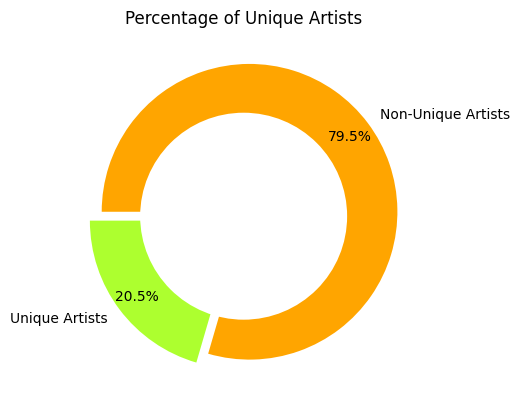

In [8]:
# Percentage of unique artists
uniqueArtistList = np.array([unique_artist, total_artists - unique_artist])
unique_artistLab = ['Unique Artists', 'Non-Unique Artists']
colors = ['#ADFF2F', '#FFA500']
explode = (0.05, 0.05)
plt.pie(uniqueArtistList, colors=colors, labels=unique_artistLab, autopct='%1.1f%%', pctdistance=0.85, explode=explode, startangle=180)
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Unique Artists')
plt.savefig('unique_artists.png')
plt.show()